In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [ ]:
# process for consulting in bigquery

sys.path.append('../query')
from extract_data_cloud import database

Downloading: 100%|██████████|


In [ ]:
database.head()
# database.shape

,ano,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,Rondônia,1100205,Porto Velho,28,7.0
1,2010,AC,Acre,1200401,Rio Branco,26,5.0
2,2010,PA,Pará,1202400,None,21,3.0
3,2010,PA,Pará,1206500,None,25,7.0
4,2010,AM,Amazonas,1302603,Manaus,41,17.0


Median: 34.0, Mean: 35.54, Std: 11.08


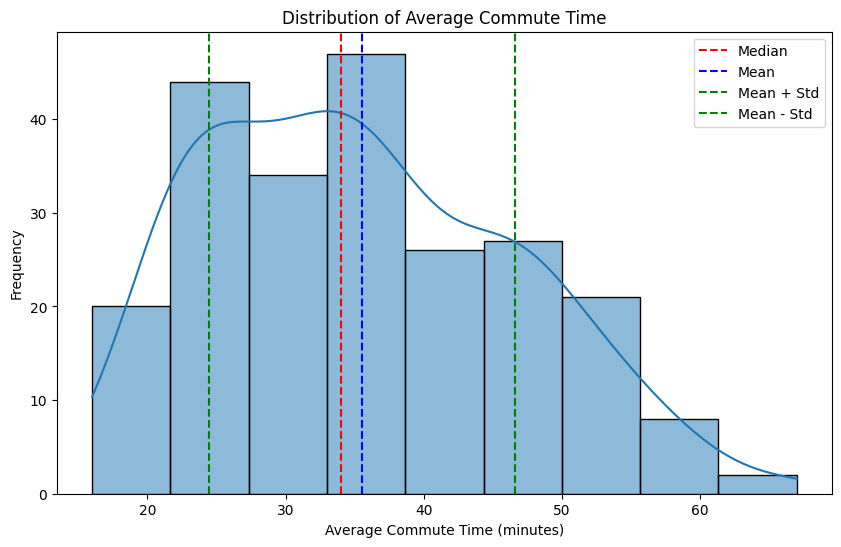

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

median = database['tempo_medio_deslocamento'].median()
mean = database['tempo_medio_deslocamento'].mean()
std = database['tempo_medio_deslocamento'].std()
print(f"Median: {median}, Mean: {mean.round(2)}, Std: {std.round(2)}")
sns.histplot(database['tempo_medio_deslocamento'], kde=True)
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(mean + std, color='green', linestyle='--', label='Mean + Std')
plt.axvline(mean - std, color='green', linestyle='--', label='Mean - Std')
plt.title('Distribution of Average Commute Time')
plt.xlabel('Average Commute Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

36 é um tempo melhor que 42.36% da base
